Import library yang akan digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

upload file dataset yang akan digunakan

contoh data winequality-red.xlsx

didapat dari https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.xlsx to winequality-red.xlsx


membaca file yang di upload dan ditampilkan dalam bentuk tabel

yaitu file winequality-red.xlsx

In [ ]:
import io
dataframe = pd.read_excel(io.BytesIO(uploaded['winequality-red.xlsx']))
X = dataframe.iloc[:,0:11]
dataframe

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


hasil tabel menampilkan 12 atribut 

preprocessing, center dan scaled dataframe yang telah dibuat

In [ ]:
scaled_dataframe = preprocessing.StandardScaler().fit_transform(X)

pca.fit(scaled_dataframe) berfungsi untuk melakukan operasi matematika PCA, seperti menghitung loading scores dan variasi yang dihitung oleh masing-masing principal component.

pca.transform(scaled_dataframe) berfungsi untuk membuat koordinat grafik PCA berdasarkan loading score dan data yang telah di scaled

In [ ]:
pca = PCA()
pca.fit(scaled_dataframe)
pca_dataframe = pca.transform(scaled_dataframe)

mencetak variance dari masing-masing principal components ke dalam scree plot

[23.63 16.65 11.34  9.45  9.1   8.94  6.3   6.07  3.71  2.94  1.86]


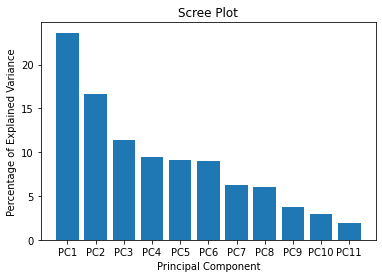

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

data scree plot menampilkan 11 PC yang memiliki nilai variance berbeda. 

Untuk mendapatkan setidaknya 90% variance membutuhkan PC1 sampai PC8 yang berjumlah 91,48%

terdapat 3 PC yang dapat direduksi dari PC9 sampai PC11 jika di reduksi lebih banyak dari 3 maka data akan semakin tidak akurat 

hasil loading score dari masing masing principal components

In [ ]:
for i in range(0, 11):
    loading_scores = pd.Series(pca.components_[i], index = ["fixedacidity", "volatileacidity", "citricacid", "residualsugar", "chlorides", "freesulfurdioxide", "totalsulfurdioxide", "density", "pH", "sulphates", "alcohol"])
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    print("PC" + str(i+1))
    print(sorted_loading_scores)
    print("\n")

PC1
fixedacidity          0.523178
citricacid            0.506861
pH                    0.501002
sulphates             0.287340
chlorides             0.260143
density               0.203718
residualsugar         0.154238
freesulfurdioxide     0.044373
volatileacidity       0.022099
totalsulfurdioxide    0.016407
alcohol               0.010871
dtype: float64


PC2
freesulfurdioxide     0.642659
totalsulfurdioxide    0.633091
residualsugar         0.343623
density               0.182104
fixedacidity          0.138108
chlorides             0.072142
sulphates             0.065609
alcohol               0.057958
pH                    0.038304
citricacid            0.035295
volatileacidity       0.017080
dtype: float64


PC3
sulphates             0.527131
chlorides             0.486368
density               0.455296
residualsugar         0.420624
fixedacidity          0.228050
volatileacidity       0.162634
totalsulfurdioxide    0.109189
freesulfurdioxide     0.088747
alcohol               0.